# 546 (Optimization for Learning and Control) hw1

You are welcome (and encouraged) to work with others, but each individual must submit their own writeup.

You are welcome to use your preferred computational toolkit -- upload the **commented** sourcecode alongside your writeup (e.g. the .ipynb file).

You are welcome to consult research articles and other materials -- upload a .pdf of the article alongside your writeup and indicate which references were used where in the writeup.

# optimization and learning for control

***Purpose:***  this sequence of exercises will introduce you to the basic concepts, problems, and techniques we'll explore throughout the course.  If you don't understand what a problem is asking or how to approach it, it's very likely there are other folks in the same boat -- please ask questions at Office Hours or on Canvas Discussions.  The problems are designed to stretch your thinking and abilities -- I encourage you to make a genuine attempt on every problem, but don't spin your wheels if you're not making good progress.

## optimization algorithms

Consider the following cost function of a scalar decision variable $u\in\mathbb{R}$:

$$ c(u) = \frac{u^{6}}{6} - \frac{7 u^{5}}{5} + \frac{17 u^{4}}{4} - \frac{17 u^{3}}{3} + 3 u^{2}. $$

a. Plot $c(u)$, $D c(u)$, and $D^2 c(u)$ for scalar $u$; use the `subplot(3,1,n)` for `n = 1, 2, 3` to align the $u$-axes of the three plots.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import linalg as la
import scipy.optimize as opt

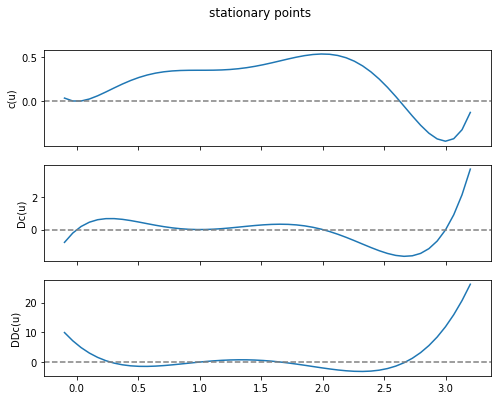

In [2]:
u = np.linspace(-0.1,3.2)

c = lambda u: u**6/6 - 7*u**5/5 + 17*u**4/4 - 17*u**3/3 + 3*u**2
Dc = lambda u: u**5 - 7*u**4 + 17*u**3 - 17*u**2 + 6*u
DDc = lambda u: 5*u**4 - 28*u**3 + 51*u**2 - 34*u + 6

fig, axs = plt.subplots(3,1,figsize=(8, 6), sharex=True)
fig.suptitle('stationary points')
axs[0].plot(u, c(u))
axs[1].plot(u, Dc(u))
axs[2].plot(u, DDc(u))
axs[0].axhline(y=0., color='grey', linestyle='--')
axs[1].axhline(y=0., color='grey', linestyle='--')
axs[2].axhline(y=0., color='grey', linestyle='--')
axs[0].set_ylabel('c(u)')
axs[1].set_ylabel('Dc(u)')
axs[2].set_ylabel('DDc(u)')

plt.show()


b. What is the minimum of $c$?  What is the minimizing $u$?

***Notice:*** $Dc(u^*) = 0$ and $D^2 c(u^*) > 0$ at the minimizing $u^*$ (similarly, $Dc(u_*) = 0$ and $D^2 c(u_*) < 0$ at the maximizing $u_*$) -- such points are termed ***stationary*** for reasons that will become clear in the next problem.

In [3]:
[xopt, fval,ierr,numfunc] = opt.fminbound(c, -0.1,2.1, full_output=True)
u_min = xopt 
c_min = fval
u_min, c_min

(4.6272465660241016e-07, 6.423417620536803e-13)


c. Run the (***gradient descent***) iteration

$$ u^+ = u - \gamma\, d(u) $$

using the actual derivative $d(u) = Dc(u)$ starting from multiple initial $u$'s and with multiple values of the parameter $\gamma > 0$.  Describe all of the outcomes (i.e. asymptotic behavior of the iteration) you observe and provide plots that illustrate these outcomes.

***Notice:*** you should observe that ***stationary points*** (where $Dc = 0$) are ***fixed points*** for this iteration, and that minimizers are (locally) attracting points for this iteration.

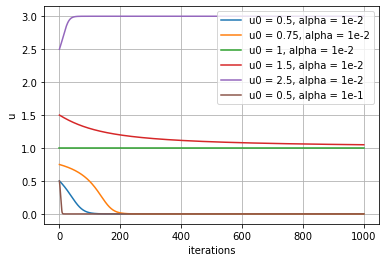

In [4]:
def GradDescent(Dc,u0,gamma,maxiters=1000):
  i = 0
  u = [u0]
  while True:
    u.append(u[i] - gamma*Dc(u[i]))
    i += 1
    if i >= maxiters:
      break    
  return u

u0,alpha = 0.5, 1e-2  
GD1 = GradDescent(Dc,u0,alpha,maxiters=1000)

u0,alpha = 0.75, 1e-2  
GD2 = GradDescent(Dc,u0,alpha,maxiters=1000)

u0,alpha = 1., 1e-2  
GD3 = GradDescent(Dc,u0,alpha,maxiters=1000)

u0,alpha = 1.5, 1e-2
GD4 = GradDescent(Dc,u0,alpha,maxiters=1000)

u0,alpha = 2.5, 1e-2 
GD5 = GradDescent(Dc,u0,alpha,maxiters=1000)

u0,alpha = 0.5, 1e-1  
GD6 = GradDescent(Dc,u0,alpha,maxiters=1000)

t = range(0,1001)

plt.figure()
plt.rcParams['font.size'] = '10'
plt.plot(t,GD1,label = 'u0 = 0.5, alpha = 1e-2')
plt.plot(t,GD2,label = 'u0 = 0.75, alpha = 1e-2')
plt.plot(t,GD3,label = 'u0 = 1, alpha = 1e-2')
plt.plot(t,GD4,label = 'u0 = 1.5, alpha = 1e-2')
plt.plot(t,GD5,label = 'u0 = 2.5, alpha = 1e-2')
plt.plot(t,GD6,label = 'u0 = 0.5, alpha = 1e-1')
plt.grid(True)
plt.xlabel(r'iterations',fontsize=10);
plt.ylabel(r'u',fontsize=10);
plt.legend(loc='upper right', fontsize=10);

d. Run the iteration above using the (***finite differences***) approximation

$$ \left[d(u)\right]_j = \frac{1}{\Delta}( c(u + \Delta\, e_j) - c(u) ) $$

($e_j = \left(0, \dots, 0, 1, 0, \dots, 0\right)^\top$ is the $j$-th standard Euclidean basis vector) starting from multiple initial $u$'s and with multiple values of the parameters $\gamma, \Delta > 0$.  Describe all of the outcomes you observe and provide plots that illustrate these outcomes.  Does $\gamma > \Delta$ or $\Delta > \gamma$ give better results?


From gradient descent equaiton:
$$ u^+ = u - \gamma\, d(u) $$ 

For the scalar case, 
$$ u^+ = u - \frac{\gamma}{\Delta}( c(u + \Delta) - c(u) ) $$


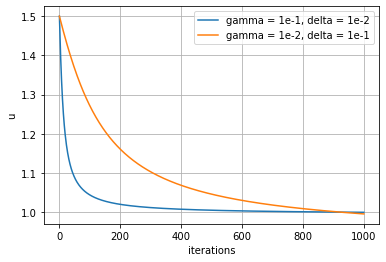

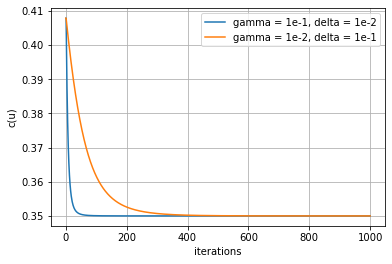

In [30]:
#finite difference (scalar case)
# def d(u,delta): 
#     return (c(u+delta)-c(u))/delta 

#finite difference to approximate gradient
def GD_FD(c,u0,gamma,delta,maxiters=1000): 
  i = 0
  u = [u0]
  cu = [c(u0)]
  while True:
    # u.append(u[i] - gamma*d(u[i],delta))
    u.append(u[i] - gamma*(c(u[i]+delta)-c(u[i]))/delta)
    cu.append(c(u[i]))
    i += 1
    if i >= maxiters:
      break    
  return u,cu
    
# gamma > delta
u0,gamma, delta = 1.5, 1e-1, 1e-2
GDFD1,cu1 = GD_FD(c,u0,gamma,delta,maxiters=1000)

# gamma < delta
u0,gamma, delta = 1.5, 1e-2, 1e-1
GDFD2,cu2 = GD_FD(c,u0,gamma,delta,maxiters=1000)

t = range(0,1001)

plt.figure()
plt.rcParams['font.size'] = '10'
plt.plot(t,GDFD1,label = 'gamma = 1e-1, delta = 1e-2')
plt.plot(t,GDFD2,label = 'gamma = 1e-2, delta = 1e-1')
plt.grid(True)
plt.xlabel(r'iterations',fontsize=10);
plt.ylabel(r'u',fontsize=10);
plt.legend(loc='upper right', fontsize=10);

plt.figure()
plt.rcParams['font.size'] = '10'
plt.plot(t,cu1,label = 'gamma = 1e-1, delta = 1e-2')
plt.plot(t,cu2,label = 'gamma = 1e-2, delta = 1e-1')
plt.grid(True)
plt.xlabel(r'iterations',fontsize=10);
plt.ylabel(r'c(u)',fontsize=10);
plt.legend(loc='upper right', fontsize=10);

plt.show()


When $\gamma > \Delta$, the step size $\frac{\gamma}{\Delta} > 1$, so the updating rate is larger, i.e. the system converges faster. However, the system may have overshooting or oscillating issues.   


e. Run one of the (***simple random search***) iterations

$$ u^+ = u - \frac{\gamma}{N\, \sigma} \sum_{n = 1}^N ( c(u + u_n) - c(u) ) \cdot u_n,\ u_n \sim \mathcal{N}(0,\sigma^2) $$

$$ u^+ = u - \frac{\gamma}{N\, \Delta} \sum_{n = 1}^N ( c(u + \Delta u_n) - c(u) ) \cdot u_n,\ u_n \sim \mathcal{S} $$

starting from multiple initial $u$'s and with multiple values of the parameters $\gamma, \Delta, \sigma > 0$, where $\mathcal{N}(0,\sigma^2)$ denotes a ***normal*** or ***Gaussian*** distribution with mean $0$ and variance $\sigma^2$ and $\mathcal{S}$ denotes the ***uniform*** distribution on the sphere.  Describe all of the outcomes (i.e. asymptotic behavior of the iteration) you observe and provide plots that illustrate these outcomes.  How should $\sigma$ or $\Delta$ relate to $\gamma$?




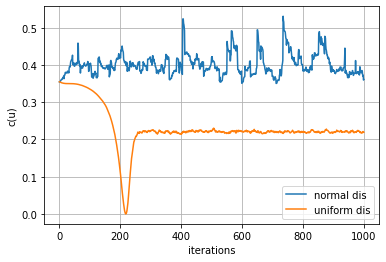

In [45]:
#normal distribution
N = 100

def GD_normal(c,u0,gamma,sigma,N,maxiters): 
  i = 0
  u = [u0]
  cu = [c(u0)]
  while True:
    un =  np.random.normal(0, sigma, N)
    u.append(u[i] - (gamma/(N*sigma))*np.sum((c(u[i]+un) - c(u[i]))*un))
    cu.append(c(u[i]))
    i += 1
    if i >= maxiters:
      break    
  return u, cu

u0, gamma, sigma = 1.2, 1e-2, 1
GD_normal1,cu_normal = GD_normal(c,u0,gamma,sigma,N,maxiters=1000)

# uniform distribution
def GD_uniform(c,u0,gamma,delta,N,maxiters): 
  i = 0
  u = [u0]
  cu = [c(u0)]
  while True:
    un =  np.random.uniform(0, delta, N)
    u.append(u[i] - (gamma/(N*delta))*np.sum((c(u[i]+delta*un) - c(u[i]))*un))
    cu.append(c(u[i]))
    i += 1
    if i >= maxiters:
      break    
  return u, cu

u0, gamma, delta = 1.2, 1e-1, 1
GD_uniform1,cu_uniform = GD_uniform(c,u0,gamma,delta,N,maxiters=1000)

t = range(0,1001)

plt.figure()
plt.rcParams['font.size'] = '10'
plt.plot(t,cu_normal,label = 'normal dis')
plt.plot(t,cu_uniform,label = 'uniform dis')
plt.grid(True)
plt.xlabel(r'iterations',fontsize=10);
plt.ylabel(r'c(u)',fontsize=10);
plt.legend(loc='lower right', fontsize=10);
plt.show()


***Bonus:*** repeat (a.--e.) with the quadratic function $c(u) = u^\top H u$ where $u\in\mathbb{R}^2$ and $H = H^\top > 0$ is a positive-definite matrix of your choosing; you may want to use the `contour` function to visualize the results.

## dynamic systems

Consider the continuous-time linear time-invariant (CT-LTI) system

$$ \dot{x}(t) = A x(t). $$

a. Verify that $x(t) = e^{A t} x(0) $ is the trajectory obtained from initial state $x(0)$.

$$ \dot{x}(t) = \frac{dx(t)}{dt} = \frac{de^{A t} x(0)}{dt} $$
and where
$\frac{de^{A t}}{dt} = Ae^{A t}$

So, 
$$  \dot{x}(t) = x(0)Ae^{A t} = A x(t)$$




The remainder of the problem will focus on the following specific $A$ (obtained from a damped harmonic oscillator):
$$ A = \left[\begin{array}{cc} 0 & 1 \\ -\kappa & -\beta \end{array} \right].$$

A discrete-time linear time-invariant (DT-LTI) approximation of the original control system with timestep parameter $\Delta > 0$ is given by

$$ x(t + \Delta) \approx x(t) + \Delta\, \dot{x}(t) = \hat{A} x(t). $$

b. Determine the matrix $\hat{A}$.

$$ x(t + \Delta) \approx x(t) + \Delta\, \dot{x}(t) = (I + \Delta A) x(t)  $$

So, for the discrete time system approximation, $\hat{A} = (I + \Delta A) = I + \Delta \left[\begin{array}{cc} 0 & 1 \\ -\kappa & -\beta \end{array} \right]$. 



c. Run the (***forward Euler***) iteration $x^+ = \hat{A} x $ with $\kappa = 1$ and $\beta = 1$ with multiple values of the parameter $\Delta > 0$ and compare with the result obtained from the expression for $x$ from (a.) (you may want to use `np.expm` to numerically evaluate this expression).  Create two types of plots to illustrate your results: (i) states $x_1,x_2$ versus time $t$; (ii) second state $x_2$ versus first state $x_1$.  You should observe that trajectories are spirals that converge to the origin ($x_1,x_2 \rightarrow 0$); is there a value of $\Delta$ that prevents this from happening?

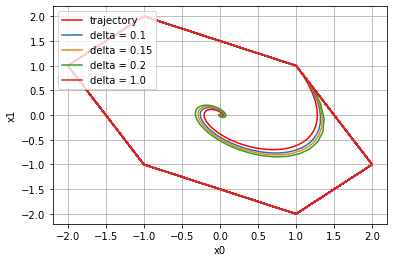

In [114]:
# CT - trajectory (x(t) = e^At x(0))
n = 100 #number of time steps
k = 1; b = 1
A = np.array([[0,1],[-k,-b]])
tspan = np.linspace(0,10,n)
x0 = np.array([1.0,1.0])
x = np.zeros((n,2))
for i in range(n):
    x[i] = la.expm(A*tspan[i])@x0 


# DT - approximation
delta = [0.1,0.15,0.2,1.0]
A_h = lambda delta: np.eye(2) + delta*A

x1 = [x0];x2 = [x0];x3 = [x0];x4 = [x0]
for i in range(len(tspan)):
    x1.append(A_h(delta[0])@x1[i])
    x2.append(A_h(delta[1])@x2[i])
    x3.append(A_h(delta[2])@x3[i])
    x4.append(A_h(delta[3])@x4[i])
    t.append(tspan[i])
x1_ = np.asarray(x1)
x2_ = np.asarray(x2)
x3_ = np.asarray(x3)
x4_ = np.asarray(x4)
t_ = np.asarray(t)

plt.figure()
plt.rcParams['font.size'] = '10'
plt.plot(x[:,0],x[:,1], color = 'r',label = 'trajectory')
plt.plot(x1_[:,0],x1_[:,1], label = 'delta = 0.1')
plt.plot(x2_[:,0],x2_[:,1], label = 'delta = 0.15')
plt.plot(x3_[:,0],x3_[:,1], label = 'delta = 0.2')
plt.plot(x4_[:,0],x4_[:,1], label = 'delta = 1.0')
plt.grid(True)
plt.xlabel(r'x0',fontsize=10);
plt.ylabel(r'x1',fontsize=10);
plt.legend(loc='upper left', fontsize=10);
plt.show()


When $\Delta > 1$, the trajectory does not converge to the origin. The step sizes were too large.

d. Repeat (c.) with $\beta = -1$.  You should observe that trajectories are divergent spirals ($x_1,x_2 \rightarrow \infty$).

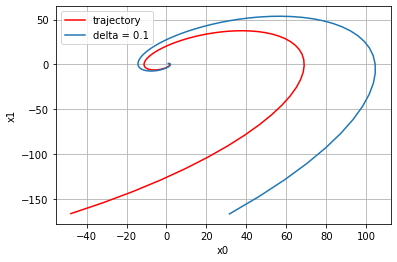

In [125]:
# CT - trajectory (x(t) = e^At x(0))
n = 100 #number of time steps
k = 1; b = -1
A = np.array([[0,1],[-k,-b]])
tspan = np.linspace(0,10,n)
x0 = np.array([1.0,1.0])
x = np.zeros((n,2))
for i in range(n):
    x[i] = la.expm(A*tspan[i])@x0 


# DT - approximation
delta = [0.1,0.15,0.2]
A_h = lambda delta: np.eye(2) + delta*A

x1 = [x0];x2 = [x0];x3 = [x0];x4 = [x0]
for i in range(len(tspan)):
    x1.append(A_h(delta[0])@x1[i])
    x2.append(A_h(delta[1])@x2[i])
    x3.append(A_h(delta[2])@x3[i])
    t.append(tspan[i])
x1_ = np.asarray(x1)
x2_ = np.asarray(x2)
x3_ = np.asarray(x3)
x4_ = np.asarray(x4)
t_ = np.asarray(t)

plt.figure()
plt.rcParams['font.size'] = '10'
plt.plot(x[:,0],x[:,1], color = 'r',label = 'trajectory')
plt.plot(x1_[:,0],x1_[:,1], label = 'delta = 0.1')
# plt.plot(x2_[:,0],x2_[:,1], label = 'delta = 0.15')
# plt.plot(x3_[:,0],x3_[:,1], label = 'delta = 0.2')
# plt.plot(x4_[:,0],x4_[:,1], label = 'delta = 1.0')
plt.grid(True)
plt.xlabel(r'x0',fontsize=10);
plt.ylabel(r'x1',fontsize=10);
plt.legend(loc='upper left', fontsize=10);
plt.show()

e. Repeat (c.) with $\beta = 0$.  You should observe that the (CT-LTI) trajectories are circles (because $\beta = 0$ corresponds to an energy-conserving oscillator), whereas the (DT-LTI) trajectories are divergent spirals (because this simulation algorithm does not preserve energy).

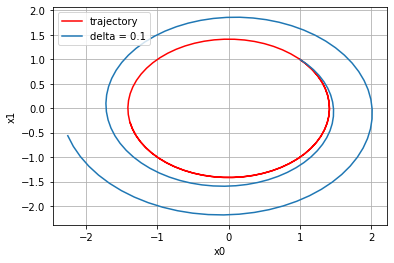

In [126]:
# CT - trajectory (x(t) = e^At x(0))
n = 100 #number of time steps
k = 1; b = 0
A = np.array([[0,1],[-k,-b]])
tspan = np.linspace(0,10,n)
x0 = np.array([1.0,1.0])
x = np.zeros((n,2))
for i in range(n):
    x[i] = la.expm(A*tspan[i])@x0 


# DT - approximation
delta = [0.1,0.15,0.2]
A_h = lambda delta: np.eye(2) + delta*A

x1 = [x0];x2 = [x0];x3 = [x0];x4 = [x0]
for i in range(len(tspan)):
    x1.append(A_h(delta[0])@x1[i])
    x2.append(A_h(delta[1])@x2[i])
    x3.append(A_h(delta[2])@x3[i])
    t.append(tspan[i])
x1_ = np.asarray(x1)
x2_ = np.asarray(x2)
x3_ = np.asarray(x3)
x4_ = np.asarray(x4)
t_ = np.asarray(t)

plt.figure()
plt.rcParams['font.size'] = '10'
plt.plot(x[:,0],x[:,1], color = 'r',label = 'trajectory')
plt.plot(x1_[:,0],x1_[:,1], label = 'delta = 0.1')
# plt.plot(x2_[:,0],x2_[:,1], label = 'delta = 0.15')
# plt.plot(x3_[:,0],x3_[:,1], label = 'delta = 0.2')
# plt.plot(x4_[:,0],x4_[:,1], label = 'delta = 1.0')
plt.grid(True)
plt.xlabel(r'x0',fontsize=10);
plt.ylabel(r'x1',fontsize=10);
plt.legend(loc='upper left', fontsize=10);
plt.show()

f. Analytically differentiate the expression for $x(t)$ from (a) with respect to the initial state $x(0)$.

$$\frac{dx(t)}{dx(0)} = \frac{de^{At}x(0)}{dx(0)} = e^{At}$$


g. Differentiate the (DT-LTI) iteration with respect to initial state and compare with the result from (f.) for $t = 1$ $\kappa = 1$ and $\beta = 0, +1, -1$.  (***Hint:*** you may consider computing the derivative analytically or numerically, e.g. using finite differences.)

In [135]:
b = [-1, 0, 1]; k = 1
delta = 1e-3
t = 1
N = 1000 #int(t/delta)
A = lambda b: np.array([[0,1],[-k,-b]])
A_h = lambda b: np.eye(2) + delta*A(b)

# differentiate x(t) wrt x(0) = e^(At)
CT1 = la.expm(A(b[0])*t) #CT-LTI for b = -1
CT2 = la.expm(A(b[1])*t) #CT-LTI for b = 0
CT3 = la.expm(A(b[2])*t) #CT-LTI for b = +1
 
# For DT-LTI
DT1 = A_h(b[0])**N #DT-LTI for b = -1
DT2 = A_h(b[1])**N #DT-LTI for b = 0
DT3 = A_h(b[2])**N #DT-LTI for b = +1

CT1,CT2,CT3,DT1,DT2,DT3

(array([[ 0.34302803,  1.45022291],
        [-1.45022291,  1.79325094]]),
 array([[ 0.54030231,  0.84147098],
        [-0.84147098,  0.54030231]]),
 array([[ 0.65970015,  0.5335072 ],
        [-0.5335072 ,  0.12619296]]),
 array([[1.        , 0.        ],
        [0.        , 2.71692393]]),
 array([[1., 0.],
        [0., 1.]]),
 array([[1.        , 0.        ],
        [0.        , 0.36769542]]))





***Bonus:*** repeat (a.--g.) for the control system $\dot{x} = A x + B u$ with trajectory expression
$$ x(t) = e^{A t} x(0) + \int_0^t e^{A (t - \tau)} B u(\tau) d\tau $$
using a sinusoidal input $u(t) = \sin(\omega t)$ ($\hat{A}$ will be the same in (b.), but you'll need to find $\hat{B}$ for the subsequent subproblems).